In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\MOHAN\ML\tennis.csv')

In [2]:
data

,outlook,humidity,windy,play
0,sunny,high,week,no
1,sunny,high,strong,no
2,overcast,high,week,yes
3,rainy,high,week,yes
4,rainy,normal,week,yes
5,rainy,normal,strong,no
6,overcast,normal,week,yes
7,sunny,high,week,no
8,sunny,normal,week,yes
9,rainy,normal,week,yes


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
outlook	= LabelEncoder()
humidity = LabelEncoder()
windy = LabelEncoder()
play = LabelEncoder()

In [5]:
data['outlook'] = outlook.fit_transform(data['outlook'])
data['humidity'] = humidity.fit_transform(data['humidity'])
data['windy'] = windy.fit_transform(data['windy'])
data['play'] = play.fit_transform(data['play'])

In [6]:
data

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,1,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [8]:
x = data[['outlook','humidity','windy']]

In [9]:
x

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [10]:
y = data.play

In [11]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
classifier = DecisionTreeClassifier(criterion='gini')

In [18]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
classifier.predict(x_test)         #play[ o: no 1:yes] 

array([1, 0, 1])

In [20]:
x_test         # outlook[sunny:2 overcast:0 rainy:1]  humidity[high:0 normal:1]  windy[week:1 strong:1]

,outlook,humidity,windy
9,1,1,1
1,2,0,0
13,1,0,0


In [21]:
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.375, 0.9, 'x[0] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

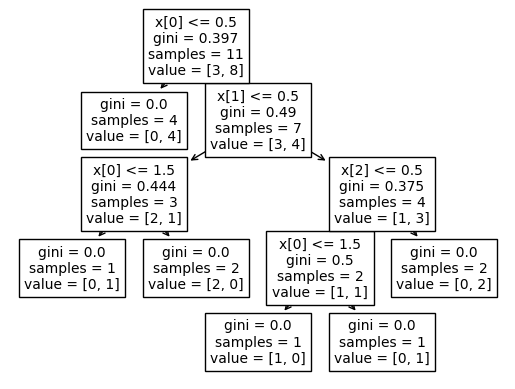

In [22]:
from sklearn import tree
tree.plot_tree(classifier)

In [23]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [24]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
classifier.predict(x_test)

array([1, 0, 1])

In [26]:
x_test

,outlook,humidity,windy
9,1,1,1
1,2,0,0
13,1,0,0


In [28]:
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.375, 0.9, 'x[0] <= 0.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[1] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

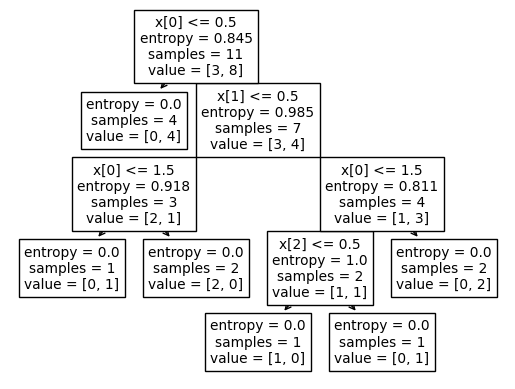

In [29]:
from sklearn import tree
tree.plot_tree(classifier)